In [1]:
from fastai import *
from fastai.vision import *

Content from this notebook has been inspired from the fast.ai [docs](https://docs.fast.ai/vision.data.html) and course-v3 Part 1. In this notebook we'll go through some ways of creating your own image dataset and training a simple classifier. We"ll also go through how to create an `ImageDataBunch` object for Object Detection and Segmentation tasks. `fastai` library uses a style called the Data Block API to simplify this process

## Creating your own dataset
### 梅？桜？
We'll be scraping plum blossom and cherry blossom images from google and classifying them. 
fastai provides a [notebook](https://github.com/fastai/course-v3/blob/master/nbs/dl1/lesson2-download.ipynb) that illustrates how to scrape images.

In [2]:
# Path is a pathlib object that you can use to perform bash style file system operations
path = Path('data')
path,path.ls()

(PosixPath('data'),
 [PosixPath('data/sakura.csv'),
  PosixPath('data/cleaned.csv'),
  PosixPath('data/ume'),
  PosixPath('data/ume.csv'),
  PosixPath('data/models'),
  PosixPath('data/sakura')])

In [8]:
folders = ['sakura','ume']
files = ['sakura.csv','ume.csv']

In [9]:
def get_images(folders):
    #make folders of every class and download image into folder from urls
    for i in range(len(folders)):
        dest = path/folders[i]
        dest.mkdir(parents=True, exist_ok=True)
        download_images(path/files[i], dest, max_pics=200)

In [10]:
# If you have problems download, try with `max_workers=0` to see exceptions:
get_images(folders)

Error https://www.washingtonpost.com/resizer/ptYrYemiic56KlNEPa4smc3N_uE=/1484x0/arc-anglerfish-washpost-prod-washpost.s3.amazonaws.com/public/2EJGK2Y4ZM3C7H2YAE3YXYJX5Y.jpg HTTPSConnectionPool(host='www.washingtonpost.com', port=443): Read timed out. (read timeout=4)
Error https://img.washingtonpost.com/wp-apps/imrs.php?src=https://img.washingtonpost.com/blogs/capital-weather-gang/files/2016/03/TidalBasin3-lr.jpg&w=1484 HTTPSConnectionPool(host='img.washingtonpost.com', port=443): Read timed out. (read timeout=4)


Error http://www.akarijapanart.com/wp-content/uploads/2015/03/%E3%81%84%E3%81%AA%E3%81%B9%E6%A2%85%E3%81%BE%E3%81%A4%E3%82%8A-300x211.jpg HTTPConnectionPool(host='www.akarijapanart.com', port=80): Max retries exceeded with url: /wp-content/uploads/2015/03/%E3%81%84%E3%81%AA%E3%81%B9%E6%A2%85%E3%81%BE%E3%81%A4%E3%82%8A-300x211.jpg (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7fb85c83d198>: Failed to establish a new connection: [Errno -2] Name or service not known',))
Error https://image.shutterstock.com/image-photo/ume-blossom-tree-450w-772454977.jpg HTTPSConnectionPool(host='image.shutterstock.com', port=443): Read timed out. (read timeout=4)
Error http://www.akarijapanart.com/wp-content/uploads/2015/03/plum-flower.jpg HTTPConnectionPool(host='www.akarijapanart.com', port=80): Max retries exceeded with url: /wp-content/uploads/2015/03/plum-flower.jpg (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7fb85c83dc50>: Failed to e

In [16]:
def check_images(folders):
    for c in folders:
        print(c)
        #Check if the images in `path` aren't broken, maybe resize them and copy it in `dest`.
        verify_images(path/c, delete=True, max_size=1024)

In [17]:
check_images(folders)

sakura


cannot identify image file <_io.BufferedReader name='data/sakura/00000053.jpg'>
cannot identify image file <_io.BufferedReader name='data/sakura/00000153.jpg'>
cannot identify image file <_io.BufferedReader name='data/sakura/00000052.png'>
cannot identify image file <_io.BufferedReader name='data/sakura/00000108.jpeg'>
cannot identify image file <_io.BufferedReader name='data/sakura/00000087.jpg'>
cannot identify image file <_io.BufferedReader name='data/sakura/00000134.jpeg'>


/home/paperspace/projects/fastai-1.0/lib/python3.6/site-packages/PIL/Image.py:1006: UserWarning: Couldn't allocate palette entry for transparency
  "for transparency")


int() argument must be a string, a bytes-like object or a number, not 'tuple'
cannot identify image file <_io.BufferedReader name='data/sakura/00000008.jpeg'>
cannot identify image file <_io.BufferedReader name='data/sakura/00000046.jpeg'>
cannot identify image file <_io.BufferedReader name='data/sakura/00000076.png'>
cannot identify image file <_io.BufferedReader name='data/sakura/00000110.jpg'>
ume


/home/paperspace/projects/fastai-1.0/lib/python3.6/site-packages/PIL/Image.py:953: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


cannot identify image file <_io.BufferedReader name='data/ume/00000039.jpg'>
cannot identify image file <_io.BufferedReader name='data/ume/00000167.jpg'>
cannot identify image file <_io.BufferedReader name='data/ume/00000091.jpg'>


In [18]:
len((path/folders[0]).ls()), len((path/folders[1]).ls())

(187, 193)

In [19]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", ds_tfms=get_transforms(),valid_pct=0.1, size=224, num_workers=4)

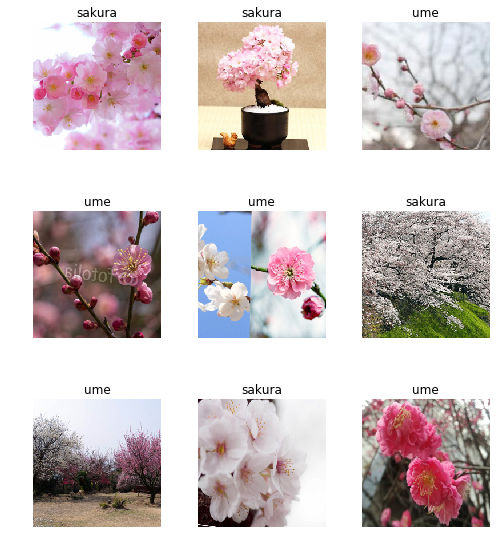

In [20]:
data.show_batch(rows=3, figsize=(7,8))

In [25]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [26]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
1,1.005482,0.601964,0.368421,00:07
2,0.781337,0.467467,0.236842,00:06
3,0.649515,0.513107,0.210526,00:07
4,0.582374,0.505246,0.210526,00:06


In [27]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate,time
1,0.352331,0.473341,0.236842,00:07
2,0.327563,0.416043,0.210526,00:06


In [28]:
interp = ClassificationInterpretation.from_learner(learn)

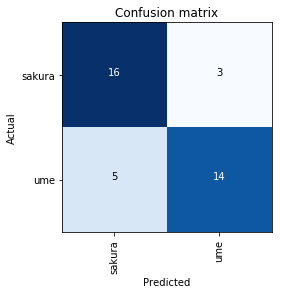

In [29]:
interp.plot_confusion_matrix()

In [ ]:
from fastai.widgets import *

In [30]:
dataset, idxs = DatasetFormatter().from_toplosses(learn)

In [31]:
ImageCleaner(dataset, idxs, path)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

## Tiny ImageNet
Okay, now that we've learned to create a simple classifier let's look at a more complicated structure. [TinyImageNet](https://tiny-imagenet.herokuapp.com/) is good example for this.

In [3]:
# Path is a pathlib object that you can use to perform bash style file system operations
path = Path('../../course-v3/nbs/dl1/data/study_group_mat/tiny-imagenet-200/')
path.ls()

[PosixPath('../../course-v3/nbs/dl1/data/study_group_mat/tiny-imagenet-200/val'),
 PosixPath('../../course-v3/nbs/dl1/data/study_group_mat/tiny-imagenet-200/train'),
 PosixPath('../../course-v3/nbs/dl1/data/study_group_mat/tiny-imagenet-200/models'),
 PosixPath('../../course-v3/nbs/dl1/data/study_group_mat/tiny-imagenet-200/test'),
 PosixPath('../../course-v3/nbs/dl1/data/study_group_mat/tiny-imagenet-200/wnids.txt'),
 PosixPath('../../course-v3/nbs/dl1/data/study_group_mat/tiny-imagenet-200/words.txt')]

In [4]:
df_labels = pd.read_csv(path/'words.txt',sep='\t',header=None,index_col=0)
df_labels.head()

,1
0,
n00001740,entity
n00001930,physical entity
n00002137,"abstraction, abstract entity"
n00002452,thing
n00002684,"object, physical object"


In [5]:
val_df = pd.read_csv(path/'val/val_annotations.txt',sep='\t',header=None,index_col=0)
val_df.head()

,1,2,3,4,5
0,,,,,
val_0.JPEG,n03444034,0,32,44,62
val_1.JPEG,n04067472,52,55,57,59
val_2.JPEG,n04070727,4,0,60,55
val_3.JPEG,n02808440,3,3,63,63
val_4.JPEG,n02808440,9,27,63,48


In [6]:
pat = r"(n\d+)/images/.+\.JPEG$"

In [7]:
trn_f = 'data/study_group_mat/tiny-imagenet-200/train/n07747607/images/n07747607_183.JPEG'
res = re.search(pat,str(trn_f))
res.group(1)

'n07747607'

In [8]:
f = str(path/'val/images/val_0.JPEG')

In [9]:
pat_val = str(path/'val/images')+'/'

In [11]:
f.replace(pat_val,'')

'val_0.JPEG'

In [16]:
def get_labels(file_path):
    # get class labels from datafram 
    res = re.search(pat,str(file_path))
    if res:
        labels = df_labels.at[res.group(1),1]
    # if no regex match check in val_df
    elif 'val' in str(file_path):
        class_id = val_df.at[str(file_path).replace(pat_val,''),1]
        labels = df_labels.at[class_id,1]
    # not val data and not regex match throw exception
    else: return Exception()
    # there are miltiple labels so we will take the first one
    return labels.split(' ')[0]

In [13]:
get_labels(f)

'go-kart'

In [14]:
tfms = get_transforms()

In [17]:
data = (ImageList.from_folder(path,recurse=True)
                .split_by_folder(train='train',valid='val')
                .label_from_func(get_labels)
                .transform(tfms)
                .databunch()
                .normalize(imagenet_stats))

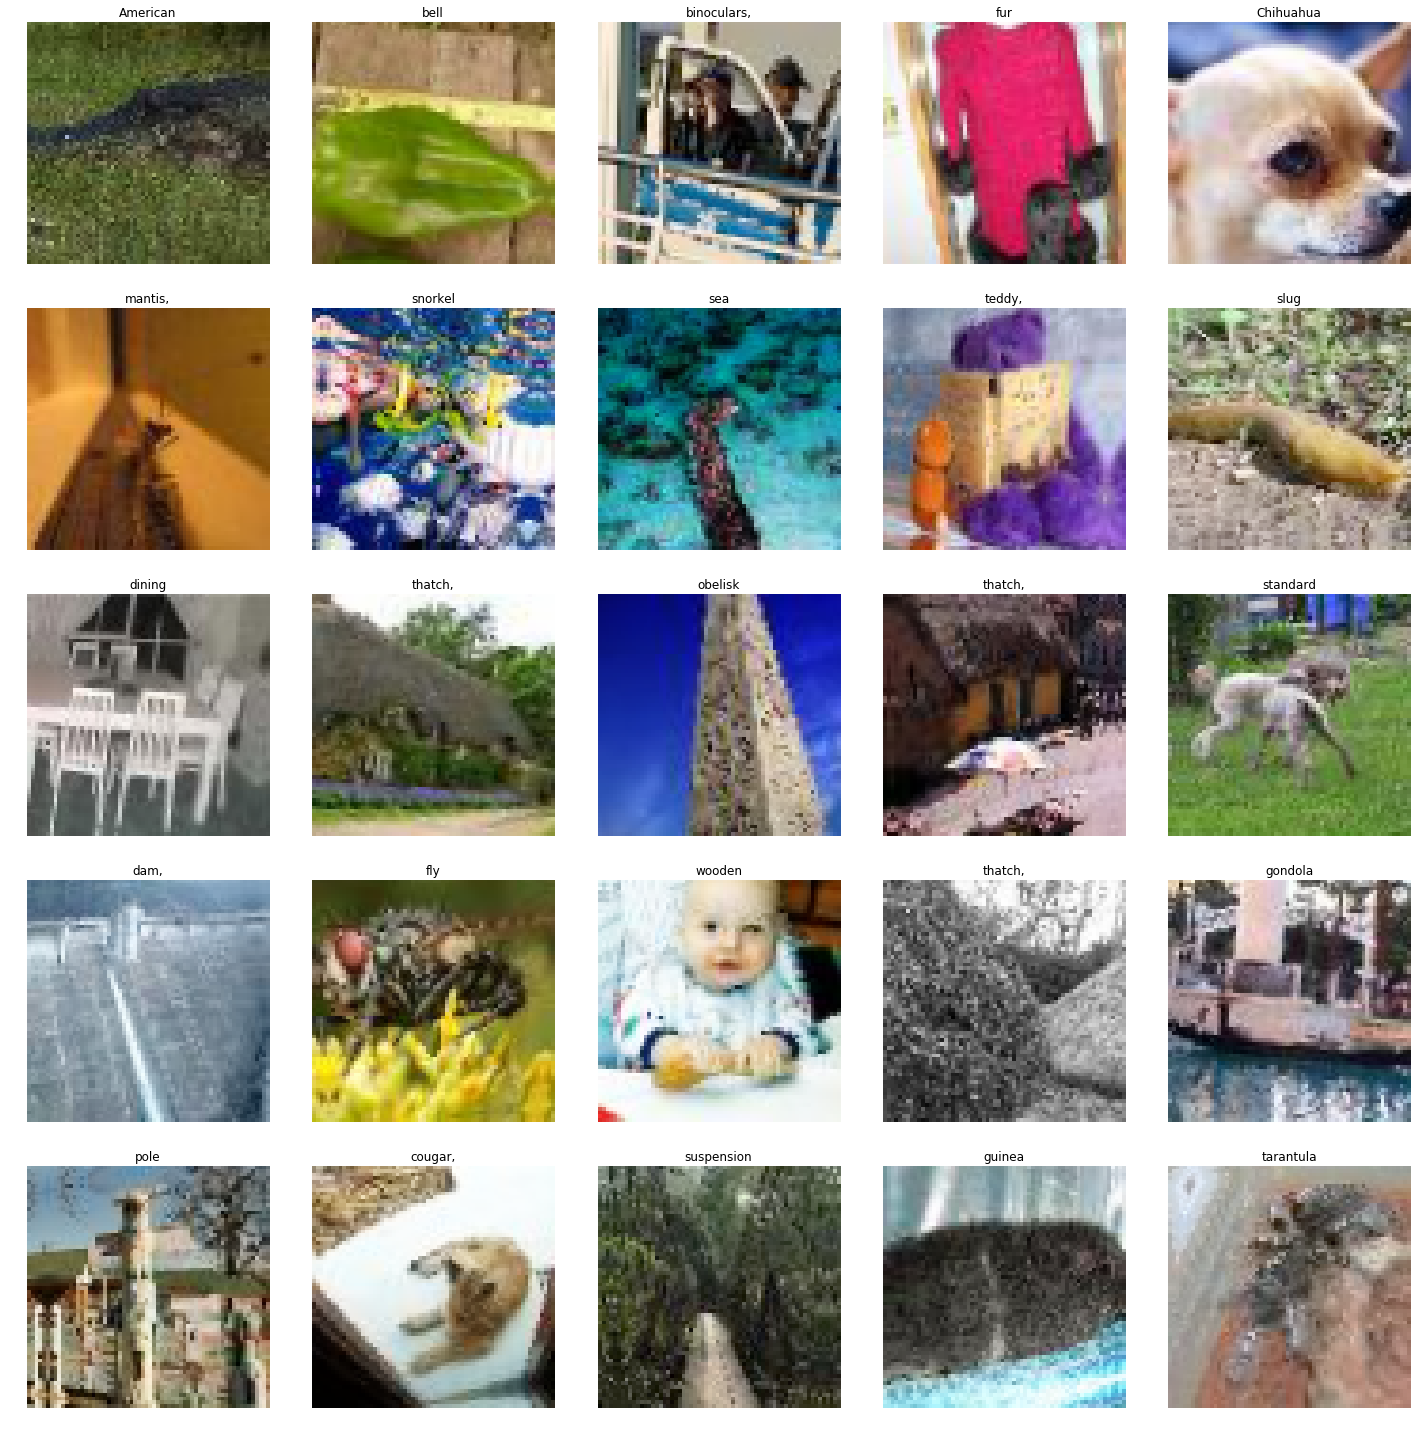

In [18]:
data.show_batch()

The `learner` step is the same as before, so we won't be going over it again.
```
learn = create_cnn(data, models.resnet34, metrics=error_rate)
learn.fit_one_cycle(4)
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))
```

## Object Detection 
Next, we'll take a look at an object detection. `fastai` provides a `ObjectItemList` class for creating a `databunch` for this task. However, similar to the previous dataset this one also has some caveats that we will explore. 
### X-Ray Images
`fastai` uses `PIL` to open images from files and then turns them into `pytorch` tensors. X-Ray images are stored as [dicom](https://pydicom.github.io/pydicom/stable/getting_started.html) files and `PIL` cannot open them. So we will try to overwrite the `open_image` (for starters) function in `fastai` and create `databunch` for an object detection task. The task here will be detecting and localizing pneumonia from x-rays.

In [19]:
path = Path('../../pneumonia/data/')
path,path.ls() 

(PosixPath('../../pneumonia/data'),
 [PosixPath('../../pneumonia/data/stage_1_test_images.zip'),
  PosixPath('../../pneumonia/data/stage_1_test_images'),
  PosixPath('../../pneumonia/data/stage_1_train_images'),
  PosixPath('../../pneumonia/data/stage_1_sample_submission.csv'),
  PosixPath('../../pneumonia/data/stage_1_train_images.zip'),
  PosixPath('../../pneumonia/data/stage_1_detailed_class_info.csv'),
  PosixPath('../../pneumonia/data/GCP%20Credits%20Request%20Link%20-%20RSNA.txt'),
  PosixPath('../../pneumonia/data/tmp'),
  PosixPath('../../pneumonia/data/models'),
  PosixPath('../../pneumonia/data/stage_1_train_labels.csv.zip'),
  PosixPath('../../pneumonia/data/stage_1_train_labels.csv'),
  PosixPath('../../pneumonia/data/stage_1_detailed_class_info.csv.zip')])

In [98]:
TRAIN_IMG = path/'stage_1_train_images'
TRAIN_LABEL = path/'stage_1_train_labels.csv'

In [104]:
import pydicom
from matplotlib import cm
from matplotlib import pyplot as plt

In [214]:
df = pd.read_csv(TRAIN_LABEL)
df.head()

,patientId,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1


In [108]:
def show_dcm_info(file):
    ##read a dicom file and print some info
    print("Filename.........:", path/file.PatientID)
    print("Storage type.....:", file.SOPClassUID)
    print()

    pat_name = file.PatientName
    display_name = pat_name.family_name + ", " + pat_name.given_name
    print("Patient's name......:", display_name)
    print("Patient id..........:", file.PatientID)
    print("Patient's Age.......:", file.PatientAge)
    print("Patient's Sex.......:", file.PatientSex)
    print("Modality............:", file.Modality)
    print("Body Part Examined..:", file.BodyPartExamined)
    print("View Position.......:", file.ViewPosition)
    
    if 'PixelData' in file:
        rows = int(file.Rows)
        cols = int(file.Columns)
        print("Image size.......: {rows:d} x {cols:d}, {size:d} bytes".format(
            rows=rows, cols=cols, size=len(file.PixelData)))
        if 'PixelSpacing' in file:
            print("Pixel spacing....:", file.PixelSpacing)

In [109]:
def show_img(file, figsize=(10,10)):
    #plot the image using matplotlib
    plt.figure(figsize=figsize)
    plt.imshow(file.pixel_array, cmap=plt.cm.bone)
    plt.show()


Filename.........: ../../pneumonia/data/0004cfab-14fd-4e49-80ba-63a80b6bddd6
Storage type.....: 1.2.840.10008.5.1.4.1.1.7

Patient's name......: 0004cfab-14fd-4e49-80ba-63a80b6bddd6, 
Patient id..........: 0004cfab-14fd-4e49-80ba-63a80b6bddd6
Patient's Age.......: 51
Patient's Sex.......: F
Modality............: CR
Body Part Examined..: CHEST
View Position.......: PA
Image size.......: 1024 x 1024, 142006 bytes
Pixel spacing....: ['0.14300000000000002', '0.14300000000000002']


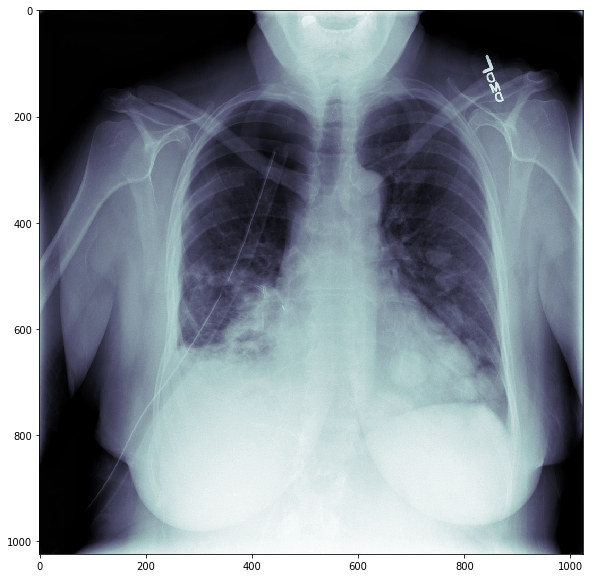

In [111]:
# Lets take a look at one x-ray
file_path = str(TRAIN_IMG/(df.iloc[0]['patientId']+'.dcm'))
file = pydicom.dcmread(file_path)
show_dcm_info(file)
show_img(file)

In [112]:
tfms = get_transforms()

In [113]:
data = (ImageList.from_df(df,TRAIN_IMG,cols='patientId',suffix='.dcm')
                 .random_split_by_pct()
                 .label_from_df('Target')
                 .transform(tfms)
                 .databunch())

OSError: cannot identify image file '../../pneumonia/data/stage_1_train_images/0004cfab-14fd-4e49-80ba-63a80b6bddd6.dcm'

In [114]:
open_image??

In [117]:
def open_image(fn:PathOrStr, div:bool=True, convert_mode:str='RGB', cls:type=Image,
        after_open:Callable=None)->Image:
    "Return `Image` object created from image in file `fn`."
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", UserWarning) # EXIF warning from TiffPlugin
        #custom open
        dicom_arr = pydicom.dcmread(file_path).pixel_array
        x = PIL.Image.fromarray(dicom_arr).convert(convert_mode)
    if after_open: x = after_open(x)
    x = pil2tensor(x,np.float32)
    if div: x.div_(255)
    return cls(x)

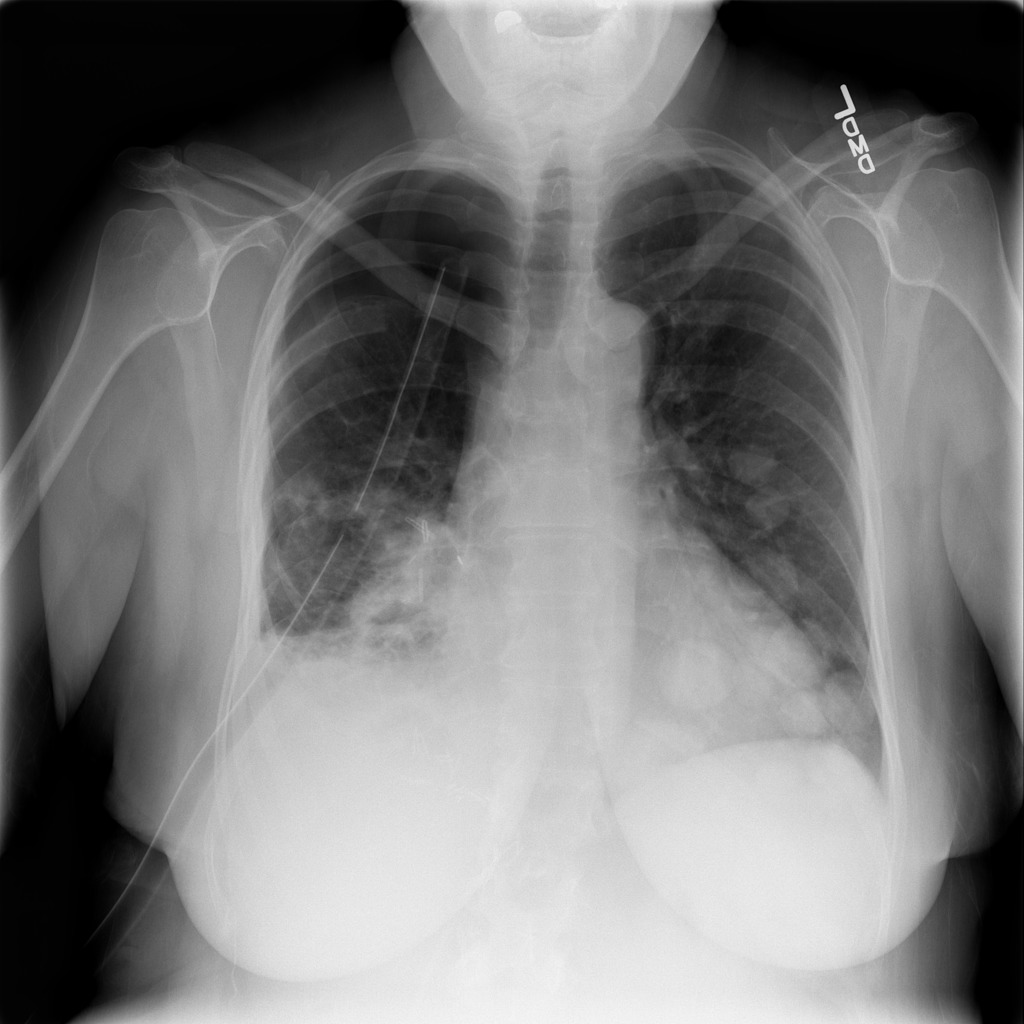

In [118]:
open_image(file_path)

In [119]:
ImageList??

In [120]:
class DicomItemList(ImageList):
    ## overwrite the open func in ImageList
    def open(self, fn): return open_image(fn)

In [121]:
data = (DicomItemList.from_df(df.head(100),TRAIN_IMG,cols='patientId',suffix='.dcm')
                 .random_split_by_pct()
                 .label_from_df('Target')
                 .transform(tfms)
                 .databunch(bs=6))

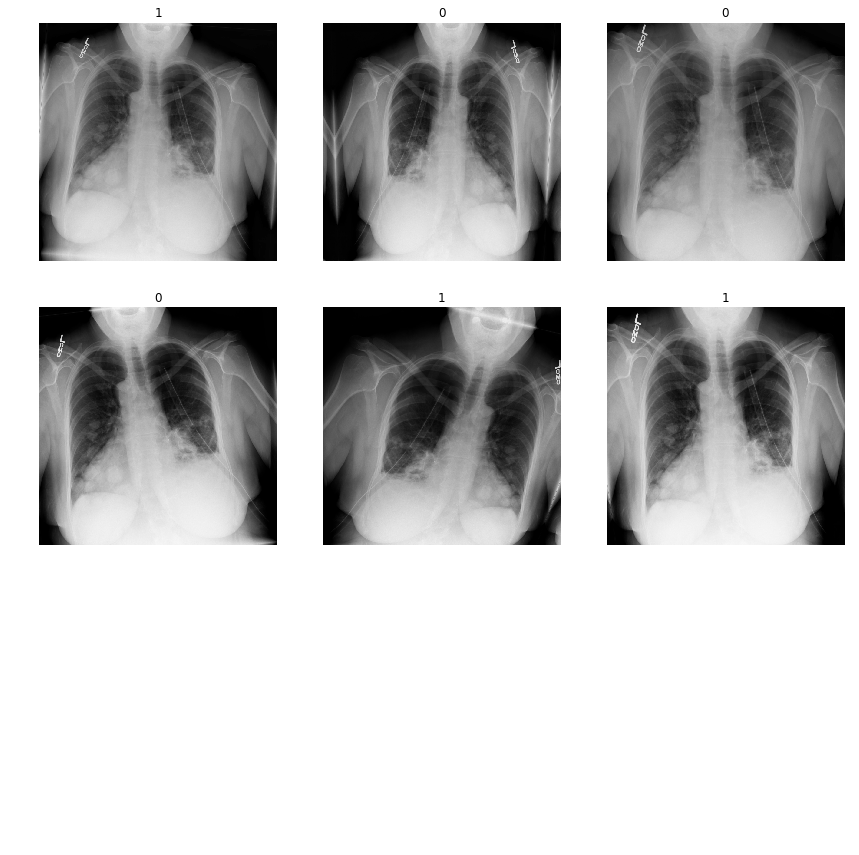

In [122]:
data.show_batch()

Now that we've learned how to open these images, next step would be to use bounding boxes to localize the areas with pneumonia.

In [136]:
ObjectItemList??

In [124]:
class DicomItemList(ObjectItemList):
    def open(self, fn): return open_image(fn)

In [215]:
df.head()

,patientId,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1


In [216]:
detailed_df = pd.read_csv(path/'stage_1_detailed_class_info.csv')
detailed_df.head()

,patientId,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity


We have two different `csv` files to look through. The first one contains the bounding boxes and the second one contains the class values. `fastai` expects the filename of the image as the `x` value and `bboxes,class` tuple as the `y` value. `bboxes,class` are lists of bounding boxes (`[[x1,y1,width1,height1],[x2,y2,width2,height2]...]`) and their corresponding class labels (`[class1,class2..]`)

In [281]:
def get_bbox_df(df, detailed_df):
    #get all bboxes and classes from dataframe
    df['duplicate'] = df.duplicated(['patientId'], keep=False)
    class_df = df.merge(detailed_df, on="patientId")
    mb_df = class_df.filter(['patientId', 'x','y','width','height'])
    
    #replace na values with the the entire image as the bbox
    na_values = {'x': 0, 'y': 0, 'width': 1024, 'height': 1024}
    mb_df = mb_df.fillna(na_values)
    
    #combine bboxes into a single string 'x1 y1 width1 height1 x2 y2 width2 height2 ...'
    mb_df['combined']=mb_df['x'].astype(str)+' '+mb_df['y'].astype(str)+' '+mb_df['width'].astype(str)+' '+mb_df['height'].astype(str)
    mb_df.drop_duplicates(subset=['patientId', 'combined'], inplace=True) 
    mb_df = mb_df.groupby('patientId').agg(lambda x: ' '.join((x)))
    
    #add target and class column to the dataframe
    targ_df = class_df.filter(['patientId','Target','class'])
    targ_df.drop_duplicates(subset=['patientId', 'Target'],inplace=True)
    mb_df = mb_df.merge(targ_df, on='patientId')
    
    #set partientId as index
    mb_df.set_index('patientId',inplace=True)
    
    return mb_df

In [282]:
mb_df = get_bbox_df(df,detailed_df)
mb_df.head()

,combined,Target,class
patientId,,,
0004cfab-14fd-4e49-80ba-63a80b6bddd6,0.0 0.0 1024.0 1024.0,0,No Lung Opacity / Not Normal
00313ee0-9eaa-42f4-b0ab-c148ed3241cd,0.0 0.0 1024.0 1024.0,0,No Lung Opacity / Not Normal
00322d4d-1c29-4943-afc9-b6754be640eb,0.0 0.0 1024.0 1024.0,0,No Lung Opacity / Not Normal
003d8fa0-6bf1-40ed-b54c-ac657f8495c5,0.0 0.0 1024.0 1024.0,0,Normal
00436515-870c-4b36-a041-de91049b9ab4,264.0 152.0 213.0 379.0 562.0 152.0 256.0 453.0,1,Lung Opacity


In [283]:
row = mb_df.loc['0004cfab-14fd-4e49-80ba-63a80b6bddd6']

In [285]:
row

combined           0.0 0.0 1024.0 1024.0
Target                                 0
class       No Lung Opacity / Not Normal
Name: 0004cfab-14fd-4e49-80ba-63a80b6bddd6, dtype: object

In [286]:
def get_bb_label(fn):
    #get labels from the dataframe in the format bboxes-->list,targets-->list
    fn = fn.replace(str(TRAIN_IMG)+'/','').replace('.dcm','')
    row = mb_df.loc[fn].values
    bboxes = row['combined'].split(' ')
    bboxes = [float(o) for o in bboxes]
    bboxes = [bboxes[i:i+4] for i in range(0,len(bboxes),4)]
    targets = row['class']
    return bboxes,[target]*len(bboxes)
    #return ','.join(str(o) for o in row[1:])

In [252]:
data = (DicomItemList.from_df(mb_df.head(200),TRAIN_IMG,cols='patientId',suffix='.dcm')
                 .random_split_by_pct()
                 .label_from_func(get_bb_label)
                 .transform(tfms)
                 .databunch(bs=6,collate_fn=bb_pad_collate))

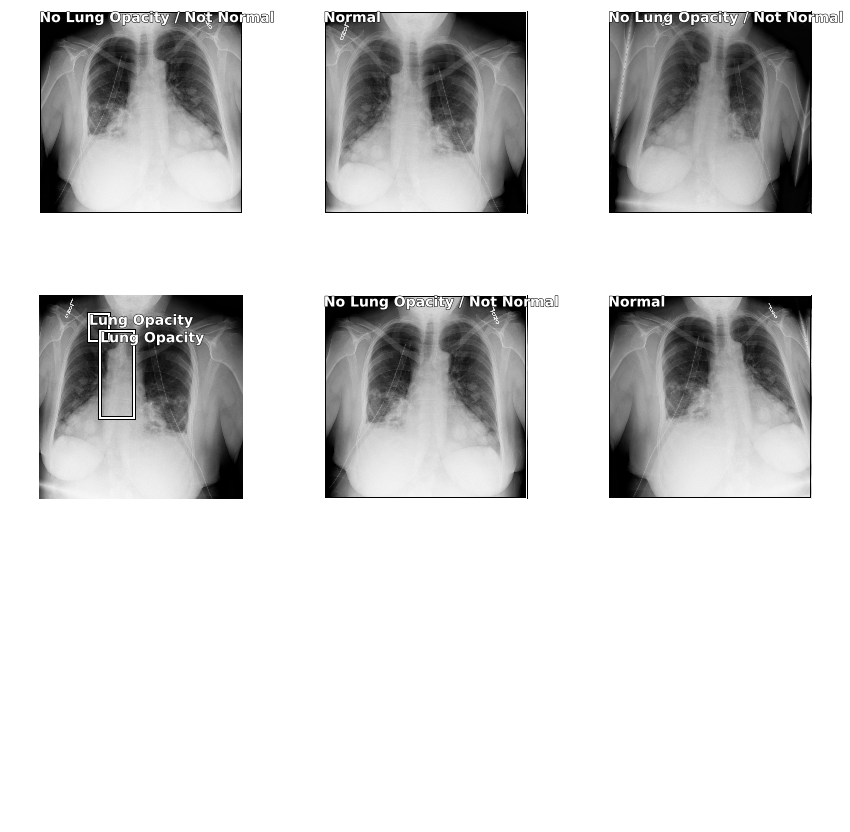

In [253]:
data.show_batch()

`fastai` doesn't yet provide an out-of-the-box Retina Net implementation yet. But probably it will be covered in part 2 of course-v3. Meanwhile, a few of people have come up with their own little models like in this [thread](https://forums.fast.ai/t/object-detection-in-fast-ai-v1/29266/10). We recommend you take a look at some examples and try to re-implement them in your own way.

## Ultrasound Image Segmentation
Finally we'll look at a segmentation task on ultrasound images. The segmentation problem is fairly straightforward, getting the `y` values are a bit tricky because of the way the dataset is structured, and the metrics are slightly different.

In [6]:
path = Path('../../nerve_seg/')
TRAIN_IMG = path/'train'
TRAIN_MASK = path/'train_masks.csv'

In [3]:
TRAIN_IMG.ls()[:4]

[PosixPath('../../nerve_seg/train/16_53.tif'),
 PosixPath('../../nerve_seg/train/44_46.tif'),
 PosixPath('../../nerve_seg/train/5_65_mask.tif'),
 PosixPath('../../nerve_seg/train/9_118.tif')]

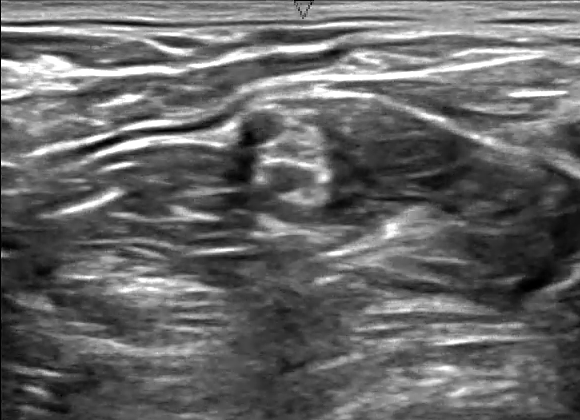

In [5]:
open_image(TRAIN_IMG/'16_53.tif')

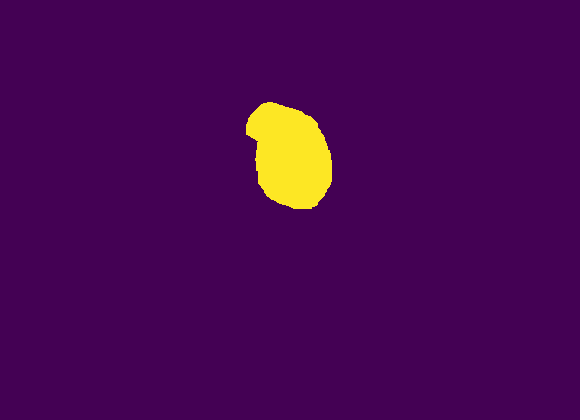

In [6]:
open_mask(TRAIN_IMG/'16_53_mask.tif')

In [7]:
def get_labels(fn):
    return str(fn).replace('.tif','_mask.tif')

In [8]:
len(TRAIN_IMG.ls())

11270

In [10]:
fn_names = TRAIN_IMG.ls()
x_imgs = [str(x) for x in fn_names if 'mask' not in str(x)]
len(x_imgs)

5635

In [2]:
#create a new class that will open masked images
class NerveSegLabelList(SegmentationLabelList):
    def open(self, fn): return open_mask(fn, div=True)
class NerveSegItemList(SegmentationItemList):
    _label_cls = NerveSegLabelList

In [12]:
data = (NerveSegItemList.from_folder(TRAIN_IMG)
                        .filter_by_func(lambda x:str(x) in x_imgs)
                        .random_split_by_pct(0.1)
                        .label_from_func(get_labels, classes=['0','1'])
                        .transform(get_transforms(), tfm_y=True)
                        .databunch(bs=2).normalize(imagenet_stats))

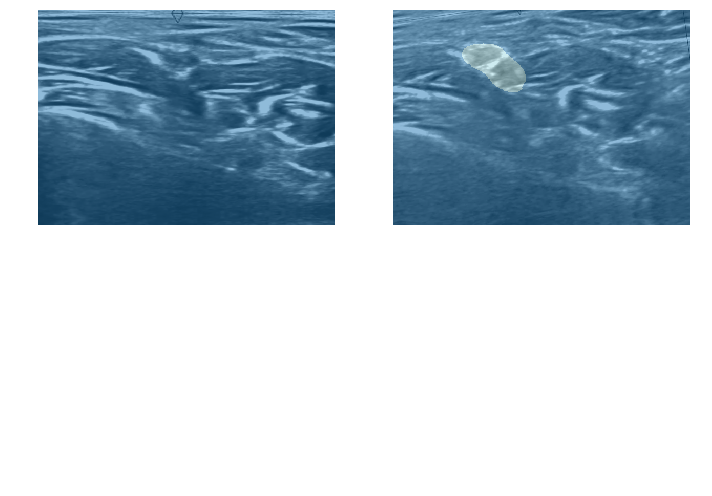

In [14]:
data.show_batch()

In [22]:
void_code = '0'
def acc_ultrsound(input, target):
    target = target.squeeze(1)
    mask = target != void_code
    return (input.argmax(dim=1)[mask]==target[mask]).float().mean()

The training code is the same as the lesson-4 notebook, so we won't bother running it.
```
learn = unet_learner(data, models.resnet34, metrics=acc_ultrsound)
lr_find(learn)
learn.recorder.plot()
learn.fit_one_cycle(4, slice(3e-3), pct_start=0.9)
```